# Berat Celik

## Research question/interests
**Is there a significant correlation between different factors that contribute to overall happiness, such as income, social support, freedom, generosity, and corruption, and how can this correlation be used to identify key areas for intervention? Additionally, what evidence-based interventions could be implemented to enhance these key areas and promote sustained and equitable well-being outcomes over time?**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.getcwd())

/Users/beratcelik/Desktop/project-group-group100/analysis/student1


In [5]:
Data2015 = pd.read_csv('/Users/beratcelik/Desktop/project-group-group100/data/processed/2015_Clean_Data.csv')
Data2016 = pd.read_csv('/Users/beratcelik/Desktop/project-group-group100/data/processed/2016_Clean_Data.csv')
Data2017 = pd.read_csv('/Users/beratcelik/Desktop/project-group-group100/data/processed/2017_Clean_Data.csv')
Data2018 = pd.read_csv('/Users/beratcelik/Desktop/project-group-group100/data/processed/2018_Clean_Data.csv')
Data2019 = pd.read_csv('/Users/beratcelik/Desktop/project-group-group100/data/processed/2019_Clean_Data.csv')
Data2020 = pd.read_csv('/Users/beratcelik/Desktop/project-group-group100/data/processed/2020_Clean_Data.csv')
Data2021 = pd.read_csv('/Users/beratcelik/Desktop/project-group-group100/data/processed/2021_Clean_Data.csv')
Data2022 = pd.read_csv('/Users/beratcelik/Desktop/project-group-group100/data/processed/2022_Clean_Data.csv')

In [6]:
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import pandas_profiling
from IPython.display import HTML
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [209]:
PATHS = []
for dirname, _, filenames in os.walk('/Users/beratcelik/Desktop/project-group-group100/data/processed'):
    for filename in filenames:
        PATHS.append(os.path.join(dirname, filename))
PATHS.sort()

In [228]:
# Read the latest CSV file from the PATHS list using pandas
df = pd.read_csv(PATHS[-1])

# Set the plotly template to plot on a dark background
pio.templates.default = "plotly_white"

# Update the default parameters for matplotlib plots with custom colors
plt.rcParams.update({
    "lines.color": "red",
    "patch.edgecolor": "blue",
    "text.color": "yellow",
    "axes.facecolor": "green",
    "axes.edgecolor": "white",
    "axes.labelcolor": "orange",
    "xtick.color": "magenta",
    "ytick.color": "cyan",
    "grid.color": "gray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"
})

In [229]:
print("There are {} rows and {} columns in the dataset.".format(df.shape[0], df.shape[1]))

There are 147 rows and 11 columns in the dataset.


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Happiness Rank                              147 non-null    int64  
 1   Country                                     147 non-null    object 
 2   Happiness Score                             146 non-null    float64
 3   Dystopia (1.83) + residual                  146 non-null    float64
 4   Explained by: GDP per capita                146 non-null    float64
 5   Explained by: Social support                146 non-null    float64
 6   Explained by: Healthy life expectancy       146 non-null    float64
 7   Explained by: Freedom to make life choices  146 non-null    float64
 8   Explained by: Generosity                    146 non-null    float64
 9   Explained by: Perceptions of corruption     146 non-null    float64
 10  Region        

In [231]:
# Select the top 10 happiest countries from the dataframe
top_10_happiest = df.nlargest(10, "Happiness Score")

# Create a bar chart using plotly
fig = px.bar(data_frame=top_10_happiest,
             y="Country",
             x="Happiness Score",
             orientation='h',
             color="Country",
             text="Happiness Score",
             color_discrete_sequence=px.colors.sequential.Blues)

# Format the chart
fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='inside', 
                  marker_line_color='rgb(0,0,0)', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.update_layout(width=800,
                  showlegend=False,
                  title="Top 10 Happiest Countries in the World",
                  xaxis=dict(title="Happiness Score", showgrid=False),
                  yaxis=dict(title="Country", showgrid=False))

# Display the chart
fig.show()

# Create another bar chart with the top 10 happiest countries colored by region
fig = px.bar(data_frame=top_10_happiest,
             y="Country",
             x="Happiness Score",
             orientation='h',
             color="Region",
             text="Happiness Score",
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Format the chart
fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='inside', 
                  marker_line_color='rgb(0,0,0)', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.update_layout(width=800,
                  title="Top 10 Happiest Countries by Region",
                  xaxis=dict(title="Happiness Score", showgrid=False),
                  yaxis=dict(title="Country", showgrid=False, autorange="reversed"))

# Display the chart
fig.show()


In [232]:
# Select the features that explain happiness from the dataframe
explained_features = df.filter(regex="Explained").columns.tolist()
explained_features.append("Dystopia (1.83) + residual")

# Create a list of bar charts using plotly
my_list = []
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
for f,c in zip(explained_features, colors):
    my_list.append(go.Bar(y=df.nlargest(10,"Happiness Score")["Country"].values,
                          x=df.nlargest(10,"Happiness Score")[f].values,
                          name=f,
                          marker=dict(color=c),
                          orientation="h"))

# Create a figure from the list of bar charts
fig = go.Figure(data=my_list)

# Format the chart
fig.update_traces(marker_line_color='rgb(0,0,0)', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.update_layout(width=900,
                  barmode='stack',
                  yaxis=dict(title="Country", autorange="reversed"),
                  xaxis=dict(title="Happiness Score"),
                  title="Top 10 Happiest Countries and Their Contributing Factors")

# Display the chart
fig.show()


In [233]:
# Select the least 10 happiest countries from the dataframe
least_10_happiest = df.nsmallest(10,"Happiness Score")

# Create a bar chart using plotly
fig = px.bar(data_frame = least_10_happiest,
             y="Country",
             x="Happiness Score",
             orientation='h',
             color="Country",
             text="Happiness Score",
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Format the chart
fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='inside', 
                  marker_line_color='rgb(0,0,0)', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.update_layout(width=800,
                  showlegend=False,
                  title="Top 10 Least Happiest Countries in the World",
                  xaxis=dict(title="Happiness Score", showgrid=False),
                  yaxis=dict(title="Country", showgrid=False))

# Display the chart
fig.show()

# Create another bar chart with the least 10 happiest countries colored by region
fig = px.bar(data_frame = least_10_happiest,
             y="Country",
             x="Happiness Score",
             orientation='h',
             color="Region",
             text="Happiness Score",
             color_discrete_sequence=px.colors.qualitative.Set3)

# Format the chart
fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='inside', 
                  marker_line_color='rgb(0,0,0)', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.update_layout(width=800,
                  title="Top 10 Least Happiest Countries by Region",
                  xaxis=dict(title="Happiness Score", showgrid=False),
                  yaxis=dict(title="Country", showgrid=False,autorange="reversed"))

# Display the chart
fig.show()


Africa's Sub-Saharan area is home to seven out of ten nations. This is hardly surprising considering the region's propensity for sickness, lack of adequate infrastructure and human resources, and lengthy history of civil strife.

In [234]:

explained_features = df.filter(regex="Explained").columns.tolist()
explained_features.append("Dystopia (1.83) + residual")
my_list = []
for f,c in zip(explained_features, px.colors.qualitative.D3):
    my_list.append(go.Bar(y=df.nsmallest(10,"Happiness Score")["Country"].values,
                          x=df.nsmallest(10,"Happiness Score")[f].values,
                          name=f,
                          marker=dict(color=c),
                          orientation="h"))
fig = go.Figure(data=my_list)
fig.update_traces(marker_line_color='rgb(255,255,255)',
                  marker_line_width=2.5, opacity=0.7)
fig.update_layout(
                width=900,
                barmode='stack',
                 yaxis=dict(autorange="reversed"),
                )
fig.show()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Happiness Rank                              147 non-null    int64  
 1   Country                                     147 non-null    object 
 2   Happiness Score                             146 non-null    float64
 3   Dystopia (1.83) + residual                  146 non-null    float64
 4   Explained by: GDP per capita                146 non-null    float64
 5   Explained by: Social support                146 non-null    float64
 6   Explained by: Healthy life expectancy       146 non-null    float64
 7   Explained by: Freedom to make life choices  146 non-null    float64
 8   Explained by: Generosity                    146 non-null    float64
 9   Explained by: Perceptions of corruption     146 non-null    float64
 10  Region        

In [246]:
# Select the values and names for the pie chart
region_counts = df["Region"].dropna().value_counts()
region_names = df["Region"].dropna().unique()

# Create a pie chart using plotly
fig = px.pie(values=region_counts,
             names=region_names,
             title="Happiness Data: % of Countries from Different Regions",
             color_discrete_sequence=px.colors.qualitative.Pastel,
             )

# Format the chart
fig.update_traces(marker_line_color='rgb(0,0,0)', 
                  marker_line_width=1.5, 
                  opacity=0.8)
fig.update_layout(width=800,
                  legend=dict(orientation="h", yanchor="bottom", y=0, xanchor="center", x=1.1))

# Display the chart
fig.show()


In [252]:
# Create a box plot using plotly
fig = px.box(df,
             x="Happiness Score",
             y="Region",
             color="Region",
             color_discrete_sequence=px.colors.qualitative.Set2,
             template="plotly_white")

# Format the chart
fig.update_traces(boxmean=True,
                  whiskerwidth=0.8,
                  marker_size=3,
                  line_width=1.5)
fig.update_layout(height=600,
                  width=800,
                  showlegend=True,
                  xaxis=dict(title="Happiness Score"),
                  yaxis=dict(title="Region", showticklabels=False),
                  title="Distribution of Happiness Scores by Region")

# Display the chart
fig.show()


In [258]:
def feature_analysis(df, feature):               
    # Group the dataframe by region and calculate the mean of the selected feature
    grouped_df = df.groupby(["Region"]).agg({feature : np.mean}).reset_index()

    # Determine the format for the text and tick labels based on the range of the feature values
    template='%{text:.2f}'
    tickformat = None
    if grouped_df[feature].min() < 1:
        template='%{text:.2}'
        tickformat = ".2%"

    # Create a bar chart using plotly
    fig = px.bar(grouped_df,
                 x="Region",
                 y=feature,
                 color="Region",
                 text=feature,
                 color_discrete_sequence=px.colors.qualitative.Pastel,
                 template="plotly_white"
                )

    # Format the chart
    fig.update_traces(texttemplate=template, 
                      textposition='outside', 
                      marker_line_color='rgb(0,0,0)', 
                      marker_line_width=1.5, 
                      opacity=0.8)

    fig.update_layout(showlegend=False,
                      title="Region vs. {}".format(feature),
                      xaxis=dict(title="Region"),
                      yaxis=dict(title=feature, tickformat=tickformat, showgrid=False))

    # Display the chart
    fig.show()
    
    return None


In [279]:
feature_names = ["Explained by: GDP per capita",
                 "Explained by: Social support",
                 "Explained by: Healthy life expectancy",
                 "Explained by: Freedom to make life choices",
                 "Explained by: Generosity",
                 "Explained by: Perceptions of corruption"]
for feature in feature_names:
    feature_analysis(df, feature)

In [280]:
k = 7
model = KMeans(k)

In [281]:
from sklearn.impute import SimpleImputer

# Define the imputer with the median strategy
imputer = SimpleImputer(strategy='median')

# Apply the imputer to the feature matrix X
X = imputer.fit_transform(df[feature_names])

# Fit the model using the imputed data
model.fit(X)


KMeans(n_clusters=7)

In [282]:
labels = model.labels_.tolist()
labels = list(map(lambda s: str(s), labels))
fig = px.scatter_3d(df,
                 x="Explained by: Generosity",
                 y="Explained by: Healthy life expectancy",
                 z="Explained by: Perceptions of corruption",
                 color=labels,
                 color_discrete_sequence=px.colors.qualitative.G10,
                 hover_data = {
                     "Country": True
                 },
                 template="plotly_dark"
            )

fig.update_traces(opacity=0.7,
                      marker_line_color='rgb(255,255,255)', 
                      marker_line_width=2.5
                      )
fig.update_layout(width=800,
                  legend=dict(title="Cluster id"),
                  title="K means clustering of happiness report (k = {})".format(k))
fig.show()

In [283]:
fig = px.scatter_3d(df,
                 x="Explained by: Generosity",
                 y="Explained by: Healthy life expectancy",
                 z="Explained by: Healthy life expectancy",
                 color="Region",
                 color_discrete_sequence=px.colors.qualitative.G10,
                 template="plotly_dark"
            )

fig.update_traces(opacity=0.7,
                  )
fig.update_traces(mode='markers',marker_line_color='rgb(255,255,255)', 
                      marker_line_width=2.5)
fig.update_layout(width=800,
                  title="Scatterplot of happiness report by region".format(k))
fig.show()

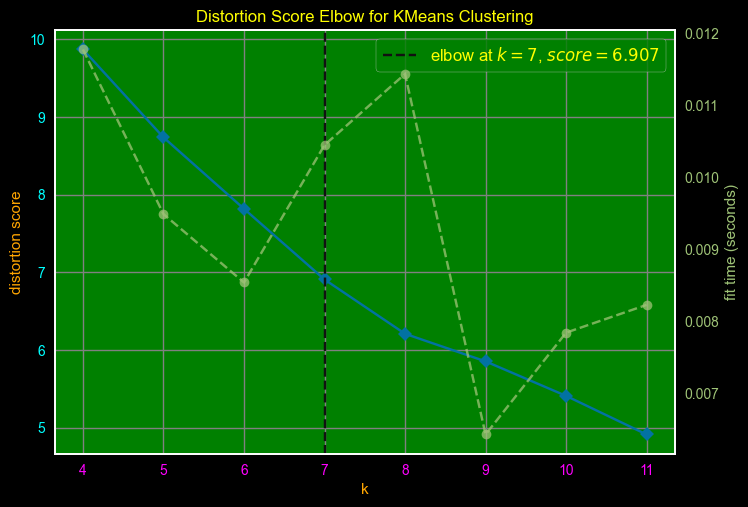

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [284]:
%matplotlib inline

visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(X)       
visualizer.show()

### Elbow is at 7.

In [285]:
# Create a histogram using plotly
fig = px.histogram(df["Happiness Score"],
                   marginal="box",
                   color_discrete_sequence=[px.colors.qualitative.Pastel[2]])

# Format the chart
fig.update_traces(opacity=0.8,
                  marker_line_color='rgb(0,0,0)', 
                  marker_line_width=1.5)
fig.update_layout(showlegend=False,
                  title="Distribution of Happiness Scores (Skewness: {:.3f})".format(df["Happiness Score"].skew()),
                  xaxis=dict(title="Happiness Score"),
                  yaxis=dict(title="Count", showgrid=False),
                  width=800)

# Display the chart
fig.show()


## Future Predictions with Linear Regression

In [286]:
df.dropna(inplace=True)
X = df[feature_names].values
y = df["Happiness Score"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [287]:
y_fitted = model.predict(X_train)
y_preds = model.predict(X_test)
print("Mean squared error for the training data is: {:.4f}".format(mean_squared_error(y_fitted, y_train)))
print("Mean squared error for the test data is: {:.4f}".format(mean_squared_error(y_preds, y_test)))

Mean squared error for the training data is: 0.0503
Mean squared error for the test data is: 0.3463
